In [1]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import numpy as np

In [2]:
import os
dirname = os.getcwd()
parent_dirname = os.path.dirname(dirname)

In [3]:
# Read in price data
df = pd.read_csv(os.path.join(parent_dirname, 'data/raw/adj_price_daily.csv'),
                 parse_dates=True, 
                 index_col="Date")

In [4]:
# Calculate daily returns
# ret = (df - df.shift()) / df.shift()
ret = np.log(df) - np.log(df.shift())
# do not drop NA

In [5]:
# remove STI
# ret = ret.drop('^STI', axis=1)

In [6]:
# Calculate mean and covariance of daily log return
mu = ret.mean()
S = ret.cov()

In [7]:
# Plot the portfolios
plot_df = pd.DataFrame({'mu':mu, 'S':np.sqrt(np.diag(S))})

In [8]:
plot_df

,mu,S
D05.SI,0.000511,0.009230
G13.SI,-0.000099,0.012034
S58.SI,0.000495,0.009870
S63.SI,0.000092,0.010530
S68.SI,0.001260,0.010036
^STI,0.000140,0.006556


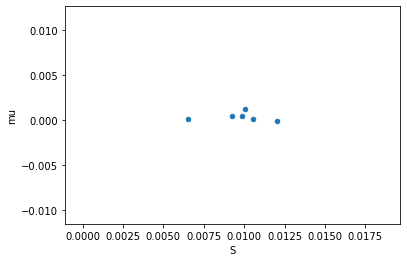

In [9]:
plot_df.plot.scatter(x='S', y='mu')

In [10]:
# Calculate correlation
r = ret.corr()
# r

In [11]:
# Portfolio analysis
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

In [12]:
# optimize wrt max sharpe ratio
raw_weights = ef.max_sharpe(risk_free_rate=0.02)
cleaned_weights = ef.clean_weights()

In [13]:
# View clean weights
cleaned_weights

{'D05.SI': 0.0,
 'G13.SI': 1.0,
 'S58.SI': 0.0,
 'S63.SI': 0.0,
 'S68.SI': 0.0,
 '^STI': 0.0}

In [14]:
ef.portfolio_performance(verbose=True)

Expected annual return: -0.0%
Annual volatility: 1.2%
Sharpe Ratio: -1.67


(-9.871247042075054e-05, 0.012034098196321986, -1.670146955969129)

In [15]:
# how much of each stock to buy?
capital = 10000

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)

da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=capital)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

5 out of 6 tickers were removed
Discrete allocation: {'G13.SI': 10695}
Funds remaining: $0.17
